In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df= pd.read_csv("insurance.csv")

In [20]:
df['BMI']= np.round((df['Weight']/(df['Height']**2)*10000),0)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      986 non-null    int64  
 1   Diabetes                 986 non-null    int64  
 2   BloodPressureProblems    986 non-null    int64  
 3   AnyTransplants           986 non-null    int64  
 4   AnyChronicDiseases       986 non-null    int64  
 5   Height                   986 non-null    int64  
 6   Weight                   986 non-null    int64  
 7   KnownAllergies           986 non-null    int64  
 8   HistoryOfCancerInFamily  986 non-null    int64  
 9   NumberOfMajorSurgeries   986 non-null    int64  
 10  PremiumPrice             986 non-null    int64  
 11  BMI                      986 non-null    float64
dtypes: float64(1), int64(11)
memory usage: 92.6 KB


In [22]:
 df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI
0,45,0,0,0,0,155,57,0,0,0,25000,24.0
1,60,1,0,0,0,180,73,0,0,0,29000,23.0
2,36,1,1,0,0,158,59,0,0,1,23000,24.0
3,52,1,1,0,1,183,93,0,0,2,28000,28.0
4,38,0,0,0,1,166,88,0,0,1,23000,32.0


In [23]:
df['BMI'].astype(int)

0      24
1      23
2      24
3      28
4      32
       ..
981    23
982    30
983    30
984    29
985    30
Name: BMI, Length: 986, dtype: int64

In [24]:
df['BMI']=df['BMI'].astype(int)

<font size= '4'>BMI feature created

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
 11  BMI                      986 non-null    int64
dtypes: int64(12)
memory usage: 92.6 KB


In [13]:
df.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
BMI                        0
dtype: int64

<font size='4'> There are no missing values in the data

In [25]:
from sklearn.preprocessing import MinMaxScaler
numerical_feature= ['Age','Height','Weight', 'BMI']

In [26]:
scaler = MinMaxScaler()
df[numerical_feature]= scaler.fit_transform(df[numerical_feature])

In [27]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI
0,0.562500,0,0,0,0,0.232558,0.074074,0,0,0,25000,0.257143
1,0.875000,1,0,0,0,0.813953,0.271605,0,0,0,29000,0.228571
2,0.375000,1,1,0,0,0.302326,0.098765,0,0,1,23000,0.257143
3,0.708333,1,1,0,1,0.883721,0.518519,0,0,2,28000,0.371429
4,0.416667,0,0,0,1,0.488372,0.456790,0,0,1,23000,0.485714


In [28]:
from sklearn.model_selection import train_test_split

In [59]:
y = df['PremiumPrice']
X = df.drop(columns={'PremiumPrice'}, axis=1)
y.shape, X.shape

((986,), (986, 11))

In [60]:
X_tr_vl, X_test, y_tr_vl, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [61]:
X_tr_vl.shape, X_test.shape, y_tr_vl.shape, y_test.shape

((788, 11), (198, 11), (788,), (198,))

In [62]:
X_train, X_val, y_train, y_val = train_test_split(X_tr_vl, y_tr_vl, test_size=0.2, random_state=1)

In [63]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((630, 11), (630,), (158, 11), (158,))

<font size = '5'> Linear Regression 

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
model_lin = LinearRegression()

In [66]:
model_lin.fit(X_train, y_train)

LinearRegression()

In [67]:
model_lin.score(X_train, y_train)

0.6457876441072443

In [68]:
y_pred= model_lin.predict(X_train)

In [43]:
error = y_train-y_pred

Text(0.5, 1.0, 'Histogram of residuals')

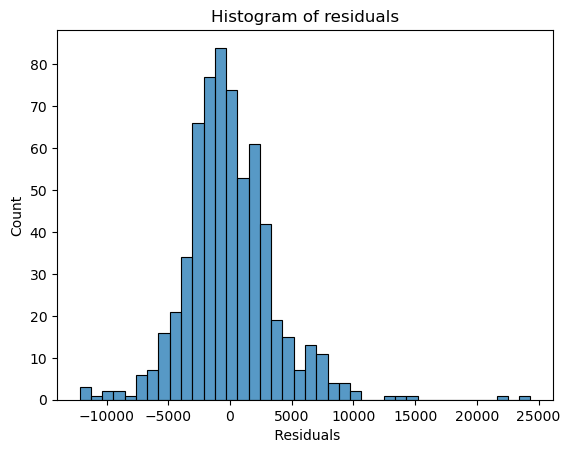

In [44]:
sns.histplot(error)
plt.xlabel(" Residuals")
plt.title("Histogram of residuals")

This looks like a normal distribution which is right skewed

In [45]:
from scipy import stats
res = stats.shapiro(error)
res.statistic

0.9357678890228271

When checked through Shapiro Wilk test. Closer the value to 1, more is the normality.

In this case, a value of 0.93 denotes a high level of normality for the error distribuiton

Text(0.5, 1.0, 'Predicted values vs Residuals')

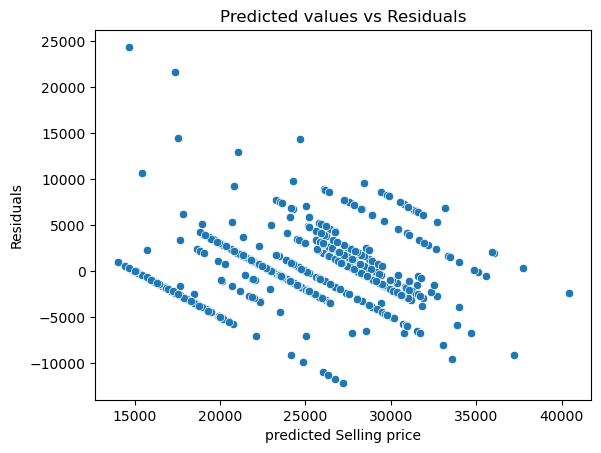

In [47]:
sns.scatterplot(x=y_pred,y=error)
plt.xlabel("predicted Selling price")
plt.ylabel("Residuals")
plt.title("Predicted values vs Residuals")

Notice that As we go from left to right,the spread of errors is almost constant
What can we understand from this constant Residuals?
We can assume that heteroskedasticity does not exist in our data
There are outliers present in the dataset

In [69]:
X

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,BMI
0,0.562500,0,0,0,0,0.232558,0.074074,0,0,0,0.257143
1,0.875000,1,0,0,0,0.813953,0.271605,0,0,0,0.228571
2,0.375000,1,1,0,0,0.302326,0.098765,0,0,1,0.257143
3,0.708333,1,1,0,1,0.883721,0.518519,0,0,2,0.371429
4,0.416667,0,0,0,1,0.488372,0.456790,0,0,1,0.485714
...,...,...,...,...,...,...,...,...,...,...,...
981,0.000000,0,0,0,0,0.558140,0.197531,0,0,0,0.228571
982,0.958333,1,1,0,0,0.186047,0.234568,0,0,3,0.428571
983,0.791667,0,1,0,0,0.232558,0.246914,0,0,1,0.428571
984,0.604167,1,1,0,0,0.302326,0.271605,1,0,1,0.400000


In [70]:
y

0      25000
1      29000
2      23000
3      28000
4      23000
       ...  
981    15000
982    28000
983    29000
984    39000
985    15000
Name: PremiumPrice, Length: 986, dtype: int64

In [72]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [73]:
X = add_constant(X)
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                    Feature         VIF
0                     const  269.988326
1                       Age    1.320621
2                  Diabetes    1.079748
3     BloodPressureProblems    1.113640
4            AnyTransplants    1.005320
5        AnyChronicDiseases    1.021191
6                    Height   24.308538
7                    Weight   54.762790
8            KnownAllergies    1.033911
9   HistoryOfCancerInFamily    1.080682
10   NumberOfMajorSurgeries    1.359890
11                      BMI   73.377751


In [74]:
X = df.drop(columns={'Height','Weight'}, axis=1)
X = df.drop(columns={'PremiumPrice'}, axis=1)

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI
0,0.562500,0,0,0,0,0,0,0,25000,0.257143
1,0.875000,1,0,0,0,0,0,0,29000,0.228571
2,0.375000,1,1,0,0,0,0,1,23000,0.257143
3,0.708333,1,1,0,1,0,0,2,28000,0.371429
4,0.416667,0,0,0,1,0,0,1,23000,0.485714
...,...,...,...,...,...,...,...,...,...,...
981,0.000000,0,0,0,0,0,0,0,15000,0.228571
982,0.958333,1,1,0,0,0,0,3,28000,0.428571
983,0.791667,0,1,0,0,0,0,1,29000,0.428571
984,0.604167,1,1,0,0,1,0,1,39000,0.400000


In [75]:
y

0      25000
1      29000
2      23000
3      28000
4      23000
       ...  
981    15000
982    28000
983    29000
984    39000
985    15000
Name: PremiumPrice, Length: 986, dtype: int64

In [79]:
X = df.drop(columns={'PremiumPrice', 'Height', 'Weight'}, axis=1)

In [80]:
X

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,BMI
0,0.562500,0,0,0,0,0,0,0,0.257143
1,0.875000,1,0,0,0,0,0,0,0.228571
2,0.375000,1,1,0,0,0,0,1,0.257143
3,0.708333,1,1,0,1,0,0,2,0.371429
4,0.416667,0,0,0,1,0,0,1,0.485714
...,...,...,...,...,...,...,...,...,...
981,0.000000,0,0,0,0,0,0,0,0.228571
982,0.958333,1,1,0,0,0,0,3,0.428571
983,0.791667,0,1,0,0,0,0,1,0.428571
984,0.604167,1,1,0,0,1,0,1,0.400000


In [81]:
X = add_constant(X)
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                   Feature        VIF
0                    const  10.088972
1                      Age   1.319424
2                 Diabetes   1.077894
3    BloodPressureProblems   1.104822
4           AnyTransplants   1.003967
5       AnyChronicDiseases   1.020624
6           KnownAllergies   1.033773
7  HistoryOfCancerInFamily   1.079270
8   NumberOfMajorSurgeries   1.358445
9                      BMI   1.007701


In [84]:
X= X.drop('const', axis=1)

In [85]:
X

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,BMI
0,0.562500,0,0,0,0,0,0,0,0.257143
1,0.875000,1,0,0,0,0,0,0,0.228571
2,0.375000,1,1,0,0,0,0,1,0.257143
3,0.708333,1,1,0,1,0,0,2,0.371429
4,0.416667,0,0,0,1,0,0,1,0.485714
...,...,...,...,...,...,...,...,...,...
981,0.000000,0,0,0,0,0,0,0,0.228571
982,0.958333,1,1,0,0,0,0,3,0.428571
983,0.791667,0,1,0,0,0,0,1,0.428571
984,0.604167,1,1,0,0,1,0,1,0.400000


Refitting Linear regression model after removing the multicollinearity

In [86]:
X_tr_vl, X_test, y_tr_vl, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [87]:
X_train, X_val, y_train, y_val = train_test_split(X_tr_vl, y_tr_vl, test_size=0.2, random_state=1)

In [88]:
model_lin.fit(X_train, y_train)

LinearRegression()

In [89]:
model_lin.score(X_train, y_train)

0.6374391956496979

<h1> Decision Trees Implementation

In [90]:
from sklearn.tree import DecisionTreeClassifier

In [93]:
model_dt = DecisionTreeClassifier(criterion='entropy')

In [95]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [96]:
model_dt.score(X_train, y_train)

1.0

Model score 1.0 indicates model is overfitting

In [97]:
model_dt.score(X_val, y_val)

0.6455696202531646

In [98]:
X_train

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,BMI
27,0.875000,0,1,0,0,0,0,2,0.685714
379,0.479167,1,1,0,0,0,0,0,0.371429
962,0.291667,1,1,0,0,1,0,0,0.285714
690,0.729167,0,0,0,0,0,0,0,0.314286
420,0.229167,0,0,0,0,0,1,1,0.171429
...,...,...,...,...,...,...,...,...,...
883,0.083333,0,1,0,0,0,1,1,0.285714
254,0.875000,1,0,0,0,1,0,2,0.571429
629,0.479167,0,0,0,1,0,0,0,0.428571
507,0.645833,0,0,0,0,0,0,2,0.257143


In [99]:
X_val

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,BMI
32,0.208333,0,0,0,0,0,0,0,0.342857
937,0.625000,1,1,0,1,0,0,0,0.257143
478,0.291667,0,0,0,0,0,1,1,0.114286
764,0.000000,1,1,0,0,0,0,0,0.542857
184,0.250000,1,1,0,0,0,0,0,0.742857
...,...,...,...,...,...,...,...,...,...
304,0.166667,0,0,0,0,0,0,0,0.342857
626,0.208333,0,0,0,1,0,0,0,0.342857
459,0.833333,0,0,1,0,0,0,0,0.114286
536,0.979167,0,1,0,0,0,0,2,0.285714


In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_validate, cross_val_score

kfold = KFold(n_splits=10)

depths = [3,4,5,6,7,9,11,13,15]

for depth in depths:
    tree_clf = DecisionTreeClassifier(random_state=7, max_depth=depth)

    cv_acc_results = cross_validate(tree_clf, X_train, y_train, cv = kfold, scoring = 'accuracy', return_train_score = True)

    print(f"K-Fold for depth:{depth} Accuracy Mean: Train: {cv_acc_results['train_score'].mean()*100} Validation: {cv_acc_results['test_score'].mean()*100}")
    print(f"K-Fold for depth: {depth} Accuracy Std: Train: {cv_acc_results['train_score'].std()*100} Validation: {cv_acc_results['test_score'].std()*100}")
    print('***************')

K-Fold for depth:3 Accuracy Mean: Train: 69.84126984126983 Validation: 66.1904761904762
K-Fold for depth: 3 Accuracy Std: Train: 0.6309891999999422 Validation: 3.552861791364982
***************
K-Fold for depth:4 Accuracy Mean: Train: 75.06172839506172 Validation: 71.74603174603173
K-Fold for depth: 4 Accuracy Std: Train: 0.5752912321093515 Validation: 4.856209060564557
***************
K-Fold for depth:5 Accuracy Mean: Train: 78.78306878306877 Validation: 73.80952380952381
K-Fold for depth: 5 Accuracy Std: Train: 0.7401105911237142 Validation: 3.567016675276861
***************
K-Fold for depth:6 Accuracy Mean: Train: 81.88712522045854 Validation: 74.28571428571429
K-Fold for depth: 6 Accuracy Std: Train: 0.5798688614734956 Validation: 3.7428019436671733
***************
K-Fold for depth:7 Accuracy Mean: Train: 87.1957671957672 Validation: 78.57142857142856
K-Fold for depth: 7 Accuracy Std: Train: 0.454465563552915 Validation: 4.447278008292665
***************
K-Fold for depth:9 Accuracy

In [101]:
tree_clf = DecisionTreeClassifier(random_state=7, max_depth=4)

In [102]:
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=7)

In [103]:
tree_clf.score(X_train,y_train)

0.7492063492063492

In [104]:
tree_clf.score(X_val,y_val)

0.6582278481012658

Slight improvement in score when max_depth hyperparameter is tuned

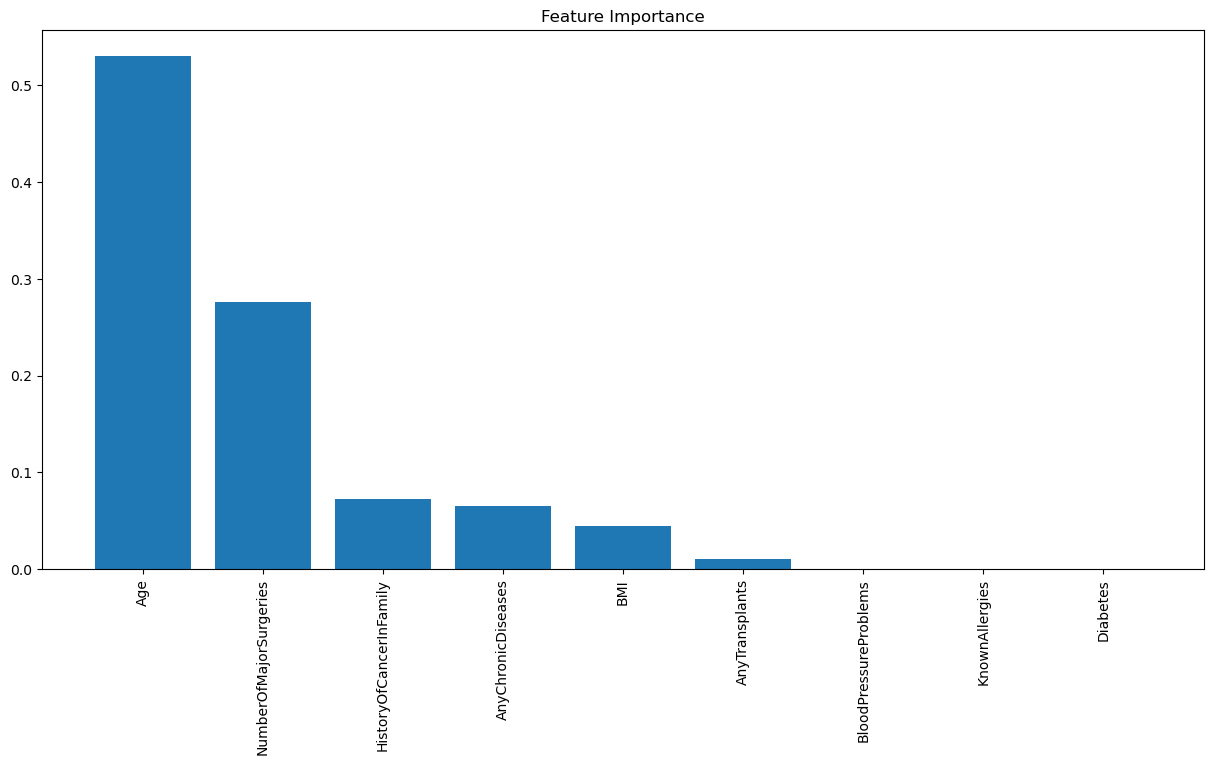

In [105]:
importances = tree_clf.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances

plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

<h1> Random Forest Modeling

In [106]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=7, max_depth=4, n_estimators=100)

In [107]:
from sklearn.model_selection import KFold, cross_validate

kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(rf_clf, X_train, y_train, cv=kfold, scoring='accuracy', return_train_score=True)

print(f"K-Fold Accuracy Mean: \n Train: {cv_acc_results['train_score'].mean()*100:.2f} \n Validation: {cv_acc_results['test_score'].mean()*100:.2f}")
print(f"K-Fold Accuracy Std: \n Train: {cv_acc_results['train_score'].std()*100:.2f}, \n Validation: {cv_acc_results['test_score'].std()*100:.2f}")

K-Fold Accuracy Mean: 
 Train: 73.54 
 Validation: 70.32
K-Fold Accuracy Std: 
 Train: 2.92, 
 Validation: 3.26


In [110]:
rf_clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, random_state=7)

In [111]:
rf_clf.score(X_train,y_train)

0.7142857142857143

In [112]:
rf_clf.score(X_val,y_val)

0.6772151898734177

<font size='4'>from 64% accuracy we've attained 68% accuracy through RandomForestClassification. trying further combinations of hyperparameters 

In [121]:

params = {
          'n_estimators' : [10,50,100,200],
          'max_depth' : [4],
          'criterion' : ['gini', 'entropy'],
          'bootstrap' : [True, False],
          'max_features' : [6,7,8,9]
         }

In [122]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator = RandomForestClassifier(),
                    param_grid = params,
                    scoring = 'accuracy',
                    cv = 3,
                    n_jobs=-1
                    )

In [123]:
grid.fit(X_train, y_train)

print("Best params: ", grid.best_params_)
print("Best score: ", grid.best_score_)

/Users/rupaligupta/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Best params:  {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 6, 'n_estimators': 50}
Best score:  0.7825396825396825


In [134]:
clf3 = RandomForestClassifier(random_state=7, bootstrap=True, criterion='entropy',
                              max_depth=4, max_features=7, n_estimators=10)

kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(clf3, X_train, y_train, cv=kfold, scoring='accuracy', return_train_score=True)

print(f"K-Fold Accuracy Mean: \n Train: {cv_acc_results['train_score'].mean()*100:.3f} \n Validation: {cv_acc_results['test_score'].mean()*100:.3f}")
print(f"K-Fold Accuracy Std: \n Train: {cv_acc_results['train_score'].std()*100:.3f}, \n Validation: {cv_acc_results['test_score'].std()*100:.3f}")

K-Fold Accuracy Mean: 
 Train: 77.637 
 Validation: 75.556
K-Fold Accuracy Std: 
 Train: 0.997, 
 Validation: 4.090


In [135]:
clf3.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, max_features=7,
                       n_estimators=10, random_state=7)

In [136]:
clf3.score(X_train, y_train)

0.7587301587301587

In [137]:
clf3.score(X_val, y_val)

0.740506329113924

<font size= '4'> Post training with Random Forest we have achieved accuracy score of 74%

In [138]:
clf3.score(X_test, y_test)

0.7070707070707071

In [139]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred_train = clf3.predict(X_train)
y_pred_test = clf3.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R^2: {train_r2}")
print(f"Testing R^2: {test_r2}")

Training MSE: 15006349.206349207
Testing MSE: 23388888.888888888
Training R^2: 0.6098419845691582
Testing R^2: 0.4229904456614695


In [140]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
perm_importance = permutation_importance(clf3, X_test, y_test, n_repeats=10, random_state=42)

# Print the feature importance
feature_names = X.columns
perm_importance_df = pd.DataFrame(perm_importance.importances_mean, index=feature_names, columns=["Importance"])
print(perm_importance_df.sort_values(by="Importance", ascending=False))

                         Importance
Age                        0.365152
NumberOfMajorSurgeries     0.200505
AnyChronicDiseases         0.044444
BMI                        0.040404
HistoryOfCancerInFamily    0.036364
AnyTransplants             0.007071
Diabetes                   0.000000
BloodPressureProblems      0.000000
KnownAllergies             0.000000


In [142]:
pip install shap

  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/5f/9e/dce41d5ec9e79add65faf4381d8d4492247b29daaa6cc7d7fd0298abc1e2/shap-0.46.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for slicer==0.0.8 from https://files.pythonhosted.org/packages/63/81/9ef641ff4e12cbcca30e54e72fb0951a2ba195d0cda0ba4100e532d929db/slicer-0.0.8-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 8.7 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [143]:
import shap

# Initialize the SHAP explainer
explainer = shap.Explainer(clf3, X_train)
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)

# Dependence plot for a specific feature
shap.dependence_plot("Age", shap_values, X_test)

ExplainerError: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. This check failed because for one of the samples the sum of the SHAP values was 0.995056, while the model output was 0.558693. If this difference is acceptable you can set check_additivity=False to disable this check.

In [144]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((630, 9), (198, 9), (630,), (198,))

In [145]:
X_train.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,BMI
27,0.875000,0,1,0,0,0,0,2,0.685714
379,0.479167,1,1,0,0,0,0,0,0.371429
962,0.291667,1,1,0,0,1,0,0,0.285714
690,0.729167,0,0,0,0,0,0,0,0.314286
420,0.229167,0,0,0,0,0,1,1,0.171429
